# LOAN CREDIT RISK PREDICTION

### Dataset Information
This dataset contains credit loan information from a lending company from 2007 to 2014.

### Company Goals
1. Approve loans for applicants who are likely to repay on time.

2. Decline loans for applicants who have a high risk of not paying back.

### Problems
Loan companies face two critical decisions involving different risks:

1. Approving loans for applicants unlikely to repay, leading to financial losses.

2. Rejecting loans for applicants likely to repay, resulting in missed business opportunities.

### Objectives
1. Predict whether an applicant is a good or bad borrower.

2. Identify the factors that indicate a borrower is high risk.

## IMPORT PACKAGES

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# import numpy and pandas for data manipulating and data analysis
import pandas as pd
import numpy as np

# import matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

#import scikit learn for modelling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#scikit learn for model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

# scikit learn for categorical variables
from sklearn.preprocessing import LabelEncoder

# scikit learn for scaling
from sklearn.preprocessing import StandardScaler, RobustScaler

# file system management
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/loan_data_2007_2014.csv")

Mounted at /content/drive


<ipython-input-3-5e997c397495>:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/loan_data_2007_2014.csv")


## DATA UNDERSTANDING

### Identify the Structure of the Dataset

In [4]:
# Show the first 5 rows of the dataframe
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Show all column names in the DataFrame
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [6]:
# Print the number of columns and rows in the DataFrame
print("Data contains %.f columns and %.f rows" %(df.shape[1], df.shape[0]))

Data contains 75 columns and 466285 rows


In [7]:
# Print the number of duplicated rows in the DataFrame
print('This data contains %.f duplicated data' %df.duplicated().sum())

This data contains 0 duplicated data


In [8]:
# Compute summary statistics for numerical columns
numerical_summary = df.describe().transpose()

# Define color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Define a function to apply background gradient
def apply_gradient(s):
    return [f'background-color: {palette(s)}' for s in s]

# Apply background gradient using Styler.apply()
styled_summary = numerical_summary.style.apply(apply_gradient)

# Show the styled summary statistics
styled_summary

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.000000,233142.000000,134605.029472,0.000000,116571.000000,233142.000000,349713.000000,466284.000000
id,466285.000000,13079729.906182,10893711.624551,54734.000000,3639987.000000,10107897.000000,20731209.000000,38098114.000000
member_id,466285.000000,14597660.622827,11682367.441450,70473.000000,4379705.000000,11941075.000000,23001541.000000,40860827.000000
loan_amnt,466285.000000,14317.277577,8286.509164,500.000000,8000.000000,12000.000000,20000.000000,35000.000000
funded_amnt,466285.000000,14291.801044,8274.371300,500.000000,8000.000000,12000.000000,20000.000000,35000.000000
funded_amnt_inv,466285.000000,14222.329888,8297.637788,0.000000,8000.000000,12000.000000,19950.000000,35000.000000
int_rate,466285.000000,13.829236,4.357587,5.420000,10.990000,13.660000,16.490000,26.060000
installment,466285.000000,432.061201,243.485550,15.670000,256.690000,379.890000,566.580000,1409.990000
annual_inc,466281.000000,73277.381470,54963.568654,1896.000000,45000.000000,63000.000000,88960.000000,7500000.000000
dti,466285.000000,17.218758,7.851121,0.000000,11.360000,16.870000,22.780000,39.990000


In [9]:
# Show the count of unique values in the 'loan_status' column
df.loan_status.value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


The loan_status variable contains several categories:

- Current: The borrower is making payments on time.

- Charged Off: The loan has been written off due to non-payment.

- Late: The borrower has missed a payment.

- In Grace Period: The borrower is within the allowed grace period before a late fee is applied.

- Fully Paid: The loan has been completely repaid.

- Default: The borrower has stopped making payments.

Based on these definitions, each borrower can be classified as either a good loaner or a bad loaner.

To simplify the classification, I will categorize borrowers as bad loaners if they have missed payments for more than 30 days or have a worse status. Borrowers outside this category will be considered good loaners.










In [10]:
# Create a mapping dictionary to categorize loan status as 'good loaner' or 'bad loaner'
mapping = {
    'Current': 'good loaner',
    'Fully Paid': 'good loaner',
    'Charged Off': 'bad loaner',
    'Late (31-120 days)': 'bad loaner',
    'In Grace Period': 'bad loaner',
    'Does not meet the credit policy. Status:Fully Paid': 'good loaner',
    'Late (16-30 days)': 'good loaner',
    'Default': 'bad loaner',
    'Does not meet the credit policy. Status:Charged Off': 'bad loaner'
}

# Replace the values in the 'loan_status' column based on the mapping
df['loan_status'] = df['loan_status'].replace(mapping)

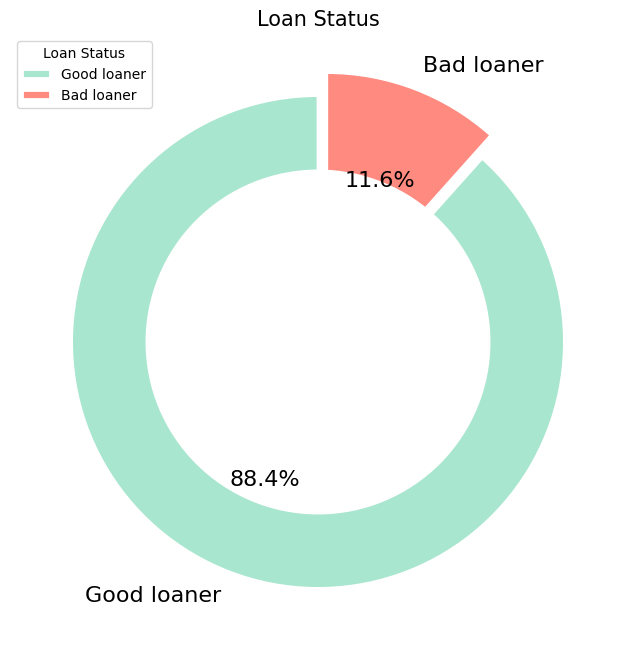

In [11]:
# Set the figure size for better visualization
plt.figure(figsize=(16,8))

# Define labels and colors for the pie chart
labels = ['Good loaner', 'Bad loaner']
colors = ['#A8E6CF', '#FF8A80']  # Warna baru
explode = [0, 0.1]

# Count the occurrences of each loan status category
loan_counts = df['loan_status'].value_counts()

# Create a pie chart to visualize loan status distribution
plt.pie(loan_counts, labels=labels, autopct='%1.1f%%', startangle=90, shadow=False, colors=colors, explode=explode, textprops={'fontsize': 16}, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Set the title and formatting
plt.title('Loan Status', fontsize=15)
plt.gca().set_aspect('equal')
plt.legend(title='Loan Status')

# Show the chart
plt.show()

The chart shows that 88.4% of borrowers are good loaners, while 11.6% are bad loaners. This indicates that most applicants repay their loans on time, but a small percentage pose a financial risk.

Who applies for credit?

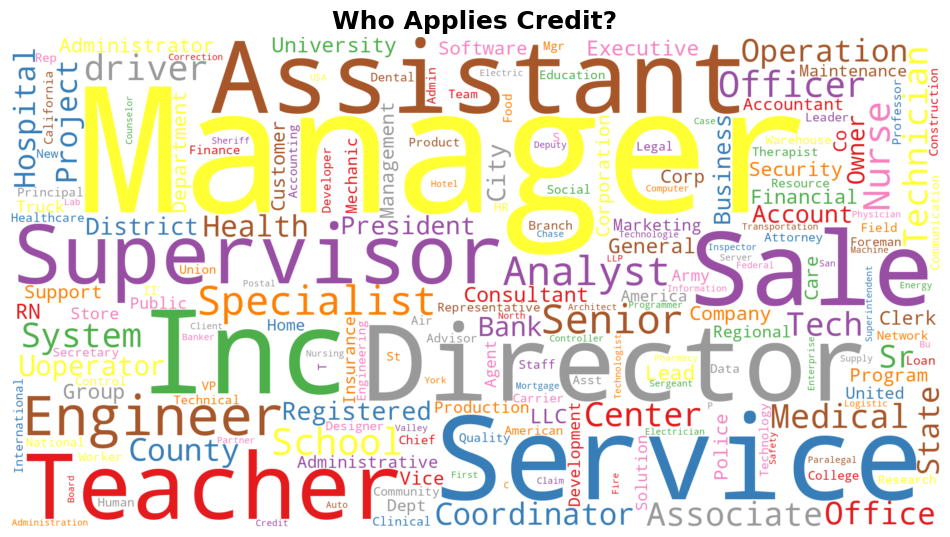

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data from the 'emp_title' column into a single string
title_loan = " ".join(str(tujuan) for tujuan in df['emp_title'].dropna())

# Generate a WordCloud visualization
word_cloud = WordCloud(
    collocations=False,
    background_color='white',
    width=2048, height=1080,
    colormap='Set1'
).generate(title_loan)

# Show WordCloud
plt.figure(figsize=(12, 12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Who Applies Credit?", fontsize=18, fontweight='bold')
plt.show()

The word cloud shows the most common job titles of individuals applying for credit. The largest words, such as Manager, Assistant, Teacher, Director, Service, and Specialist, indicate that professionals from various industries, including management, education, healthcare, and technical fields, frequently seek loans. This suggests that credit applicants come from diverse backgrounds, with a significant number in leadership and service-oriented roles.










Where are the borrowers domiciled?

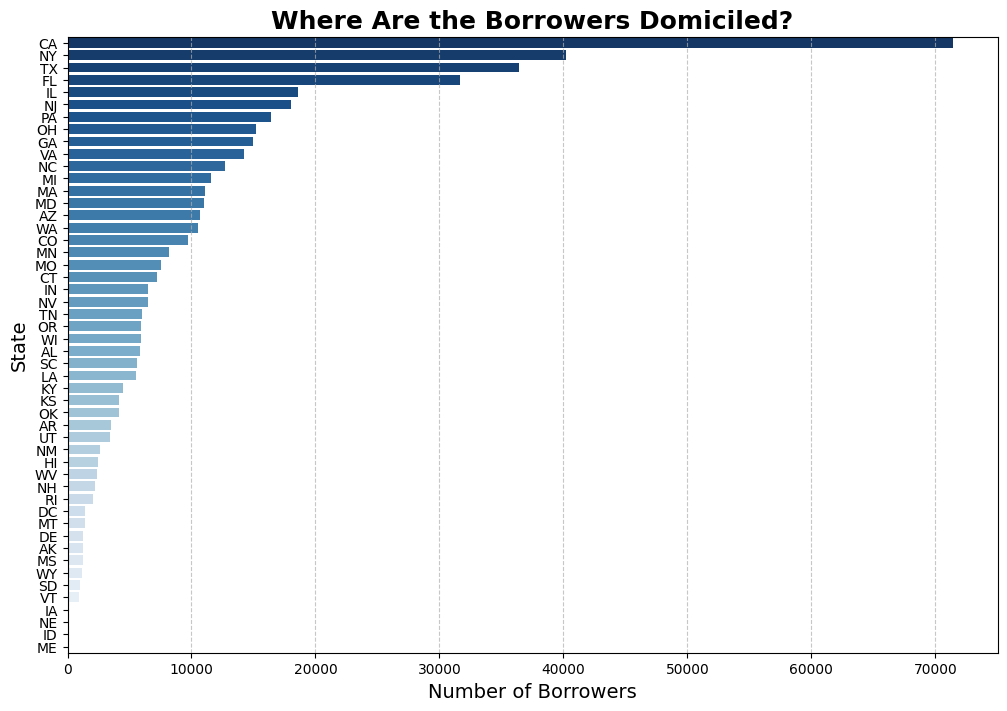

In [13]:
# Sort the data by the number of borrowers in each state
state_counts = df['addr_state'].value_counts()
colors = sns.color_palette("Blues", len(state_counts))[::-1]
plt.figure(figsize=(12, 8))
sns.barplot(x=state_counts.values, y=state_counts.index, palette=colors)
plt.title('Where Are the Borrowers Domiciled?', fontsize=18, fontweight='bold')
plt.xlabel('Number of Borrowers', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

The bar chart shows the number of borrowers by state, with California (CA), New York (NY), Texas (TX), and Florida (FL) having the highest number of borrowers. This suggests that loan applications are more concentrated in highly populated and economically active states.

Why did borrowers apply for loans?

Text(0.5, 0, 'Proportion of Customers')

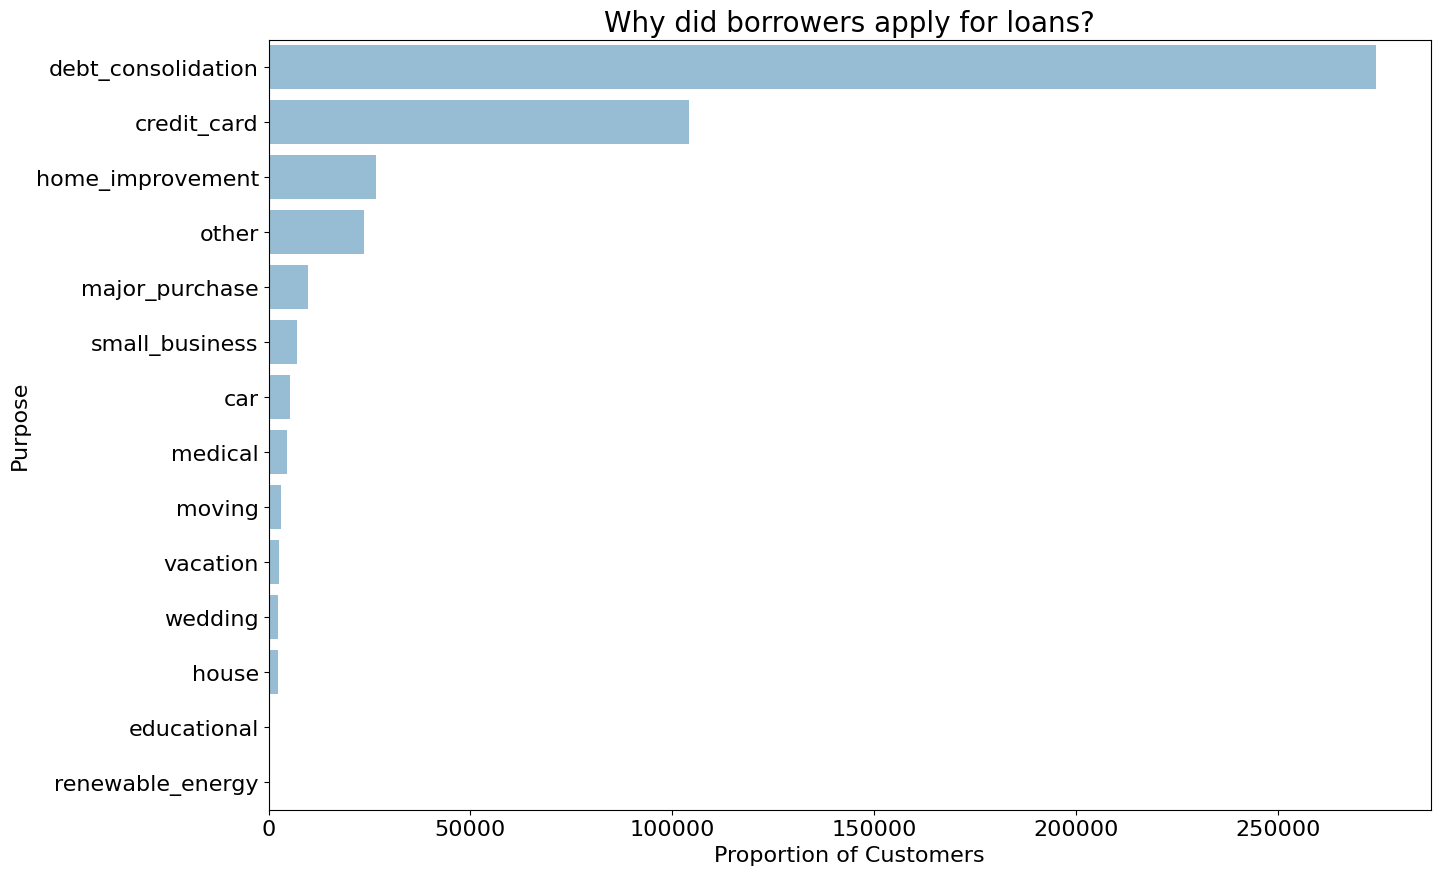

In [14]:
# Get the loan purpose categories sorted by frequency in descending order
order = df['purpose'].value_counts(ascending=False).index
plt.figure(figsize=(15,10))
ax = sns.countplot(y='purpose', data=df, orient='v', order=order, color='#8CC0DE')
plt.title('Why did borrowers apply for loans?', fontsize=20)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_ylabel("Purpose",fontsize=16)
ax.set_xlabel("Proportion of Customers",fontsize=16)

Based on the visualization above, the majority of borrowers applied for loans for debt consolidation and credit card purposes. This suggests that many borrowers are using loans to manage existing debts.

In [15]:
# Create a copy of the original DataFrame to preserve the original data
df2=df.copy()

## EXPLORATORY DATA ANALYSIS

In [16]:
# Show DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [17]:
# Show the first 5 rows of the dataset
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check Categorical Feature

In [18]:
# Count the number of unique values in categorical column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

,0
term,2
grade,7
sub_grade,35
emp_title,205475
emp_length,11
home_ownership,6
verification_status,3
issue_d,91
loan_status,2
pymnt_plan,2


### Missing Value

In [19]:
# Check the percentage of missing values in each column
missing_values = df.isnull().sum() / len(df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False, inplace=True)
missing_values

,0
inq_fi,1.000000
open_rv_24m,1.000000
max_bal_bc,1.000000
all_util,1.000000
inq_last_12m,1.000000
annual_inc_joint,1.000000
verification_status_joint,1.000000
dti_joint,1.000000
total_cu_tl,1.000000
il_util,1.000000


The data has 40 columns with missing values, which means some information is incomplete. This could affect analysis and decision-making. To fix this, we need to check why the data is missing and decide the best way to handle it, such as filling in missing values, removing incomplete data, or using other methods to ensure accurate results.

In [20]:
# Filter columns with more than 50% missing values
missing_values = missing_values[missing_values > 0.50]
missing_values_sorted = missing_values.sort_values(ascending=False)
print(missing_values_sorted)

inq_fi                         1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_last_12m                   1.000000
annual_inc_joint               1.000000
verification_status_joint      1.000000
dti_joint                      1.000000
total_cu_tl                    1.000000
il_util                        1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
open_il_24m                    1.000000
open_il_12m                    1.000000
open_il_6m                     1.000000
open_acc_6m                    1.000000
open_rv_12m                    1.000000
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
desc                           0.729820
mths_since_last_delinq         0.536906
dtype: float64


There are 21 columns with more than 50% missing values in the dataset. To keep the data clean and reliable, these columns were removed. This helps make the analysis more accurate and avoids problems caused by too much missing data.

In [21]:
# Drop columns that have more than 50% missing values
df = df.drop(columns=missing_values_sorted.index)

In [22]:
# Show the first 5 rows of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

There are still some columns in the dataset that do not significantly contribute to answering the desired objective. Therefore, these columns will be removed. Some of them include:

- Unnamed: 0
- id
- member_id
- url
- grade
- emp_title
- sub_grade
- home_ownership
- verification_status
- purpose
- pymnt_plan
- title
- zip_code
- addr_state
- policy_code
- application_type
- initial_list_status
- funded_amnt_inv
- total_pymnt
- total_pymnt_inv

In [23]:
# Define a list of columns to be dropped
drop_columns = [
    'Unnamed: 0', 'id', 'member_id', 'url', 'grade','emp_title', 'sub_grade', 'home_ownership', 'verification_status', 'purpose',
    'pymnt_plan', 'title', 'zip_code', 'addr_state', 'policy_code',
    'application_type', 'initial_list_status', 'funded_amnt_inv',
    'total_pymnt', 'total_pymnt_inv'
]

# Remove drop_columns from the DataFrame
df = df.drop(columns=drop_columns)

In [24]:
# Show the number of rows and columns in the DataFrame
df.shape

(466285, 34)

In [25]:
# Show the names of all columns in the DataFrame
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'annual_inc', 'issue_d', 'loan_status', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [26]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

emp_length                     21008
annual_inc                         4
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
open_acc                          29
pub_rec                           29
revol_util                       340
total_acc                         29
last_pymnt_d                     376
next_pymnt_d                  227214
last_credit_pull_d                42
collections_12_mths_ex_med       145
acc_now_delinq                    29
tot_coll_amt                   70276
tot_cur_bal                    70276
total_rev_hi_lim               70276
dtype: int64


Based on the data, there are still some columns that contain missing values. Below are the columns with missing data that will be removed along with the reasons:

- next_pymnt_d: Only applies to active loans, making it irrelevant for prediction.

- last_pymnt_d: Has the potential to cause data leakage.

- last_credit_pull_d: Does not have a significant impact on the model being developed.

- tot_coll_amt: Contains too many missing values, making imputation unfeasible.

- tot_cur_bal: Contains too many missing values, making imputation unfeasible.

- total_rev_hi_lim: Contains too many missing values, making imputation unfeasible.

Next, here are the columns with missing values that are considered to be kept since imputation is still possible, along with the reasons:

- emp_length: Missing values can be filled with "Unknown" since it is categorical.

- revol_util: Missing values can be filled with the median value, as it represents a percentage of credit utilization.

- collections_12_mths_ex_med: Missing values can be filled with 0 based on the majority of the data.










In [27]:
# Remove rows with missing values in selected columns
df = df.dropna(subset=[
    'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
])

# Impute missing values for specific columns
df['emp_length'].fillna('Unknown', inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)

<ipython-input-27-5d9a07107737>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'].fillna('Unknown', inplace=True)
<ipython-input-27-5d9a07107737>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revol_util'].fillna(df['revol_util'].median(), inplace=True)
<ipython-input-27-5d9a07107737>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['collections_12_mths_ex_med'].fillna(0, inplace=True)


In [28]:
# Check if there are any missing values left in the dataset
print(df.isnull().sum().sum())

0


In [29]:
# Show the first 5 rows of the dataset
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,27050,27050,36 months,10.99,885.46,10+ years,55000.0,Dec-13,good loaner,22.87,...,0.0,Jan-16,885.46,Feb-16,Dec-15,0.0,0.0,0.0,114834.0,59900.0
42536,9750,9750,36 months,13.98,333.14,1 year,26000.0,Dec-13,good loaner,25.12,...,0.0,Jan-16,333.14,Feb-16,Jan-16,0.0,0.0,0.0,14123.0,15100.0
42537,12000,12000,36 months,6.62,368.45,10+ years,105000.0,Dec-13,good loaner,14.05,...,0.0,Jan-16,368.45,Feb-16,Jan-16,0.0,0.0,0.0,267646.0,61100.0
42539,15000,15000,36 months,8.90,476.30,2 years,63000.0,Dec-13,good loaner,16.51,...,0.0,Jan-16,476.30,Feb-16,Jan-16,0.0,0.0,1514.0,272492.0,15400.0
42540,12000,12000,36 months,11.99,398.52,10+ years,130000.0,Dec-13,good loaner,13.03,...,0.0,Jan-16,398.52,Feb-16,Jan-16,0.0,0.0,0.0,327264.0,16200.0


From the data preview above, the next step in data cleaning will focus on the following columns:

- term
- emp_length
- issue_d
- earliest_cr_line
- last_pymnt_d
- next_pymnt_d
- last_credit_pull_d

Cleaning the `term` Column

In [30]:
# Check unique values in the 'term' column

df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

It can be seen that there are two types of data: '36 months' and '60 months'. Since the data is still in string format, we will convert it to integers.

In [31]:
# Remove the string " months" and convert the 'term' column to integer type
df['term'] = df['term'].str.replace(" months", "").astype(int)

# Check unique values in the 'term' column after conversion
df['term'].unique()

array([36, 60])

Cleaning the `emp_length` Column

In [32]:
# Check unique values in the 'emp_length' column
df['emp_length'].unique()

array(['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years',
       '6 years', '9 years', '8 years', '< 1 year', '5 years', 'Unknown'],
      dtype=object)

In [33]:
# Check how many times each value appears in the 'emp_length' column
df['emp_length'].value_counts()

,count
emp_length,
10+ years,80257
2 years,19465
3 years,17636
< 1 year,16734
1 year,13875
5 years,13695
7 years,12991
4 years,12830
Unknown,12198


It can be seen that there are several categorical data types in the `emp_length` column. We will convert this data into integers. Additionally, the 'Unknown' data will be removed since its quantity is small compared to other data.

In [34]:
# Convert employment length to numbers
df['emp_length'] = df['emp_length'].replace({
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0
})

# Remove rows where 'emp_length' is 'Unknown'
df = df[df['emp_length'] != 'Unknown']

# Change 'emp_length' to integer type
df['emp_length'] = df['emp_length'].astype(int)

<ipython-input-34-d53542e4a69d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'] = df['emp_length'].astype(int)


In [35]:
# Show unique values in the 'emp_length' column after conversion
df['emp_length'].unique()

array([10,  1,  2,  4,  3,  7,  6,  9,  8,  0,  5])

Cleaning the `issue_d`, `earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d`, and `last_credit_pull_d` Column

In [36]:
# Convert selected columns to datetime format
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

for col in date_columns:
  df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')

In [37]:
# Show the first 5 rows of the date columns
df[date_columns].head()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
42535,2013-12-01,1986-10-01,2016-01-01,2016-02-01,2015-12-01
42536,2013-12-01,2007-01-01,2016-01-01,2016-02-01,2016-01-01
42537,2013-12-01,1994-03-01,2016-01-01,2016-02-01,2016-01-01
42539,2013-12-01,1998-03-01,2016-01-01,2016-02-01,2016-01-01
42540,2013-12-01,1997-11-01,2016-01-01,2016-02-01,2016-01-01


### Correlation Matrix

In [38]:
# Show summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220286 entries, 42535 to 466284
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   220286 non-null  int64         
 1   funded_amnt                 220286 non-null  int64         
 2   term                        220286 non-null  int64         
 3   int_rate                    220286 non-null  float64       
 4   installment                 220286 non-null  float64       
 5   emp_length                  220286 non-null  int64         
 6   annual_inc                  220286 non-null  float64       
 7   issue_d                     220286 non-null  datetime64[ns]
 8   loan_status                 220286 non-null  object        
 9   dti                         220286 non-null  float64       
 10  delinq_2yrs                 220286 non-null  float64       
 11  earliest_cr_line            220286 non-n

In [39]:
# Show the first five rows of the dataset
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,27050,27050,36,10.99,885.46,10,55000.0,2013-12-01,good loaner,22.87,...,0.0,2016-01-01,885.46,2016-02-01,2015-12-01,0.0,0.0,0.0,114834.0,59900.0
42536,9750,9750,36,13.98,333.14,1,26000.0,2013-12-01,good loaner,25.12,...,0.0,2016-01-01,333.14,2016-02-01,2016-01-01,0.0,0.0,0.0,14123.0,15100.0
42537,12000,12000,36,6.62,368.45,10,105000.0,2013-12-01,good loaner,14.05,...,0.0,2016-01-01,368.45,2016-02-01,2016-01-01,0.0,0.0,0.0,267646.0,61100.0
42539,15000,15000,36,8.90,476.30,2,63000.0,2013-12-01,good loaner,16.51,...,0.0,2016-01-01,476.30,2016-02-01,2016-01-01,0.0,0.0,1514.0,272492.0,15400.0
42540,12000,12000,36,11.99,398.52,10,130000.0,2013-12-01,good loaner,13.03,...,0.0,2016-01-01,398.52,2016-02-01,2016-01-01,0.0,0.0,0.0,327264.0,16200.0


In [40]:
# Show statistical summary of numerical columns, excluding object and datetime columns
df.describe(exclude=['object', 'datetime64'])

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,220286.000000,220286.000000,220286.000000,220286.000000,220286.000000,220286.000000,2.202860e+05,220286.000000,220286.000000,220286.000000,...,220286.000000,220286.000000,220286.0,220286.0,220286.000000,220286.000000,220286.000000,220286.000000,2.202860e+05,2.202860e+05
mean,15327.400289,15327.382357,43.954822,13.838894,453.051158,6.202968,7.580857e+04,18.051912,0.331460,0.704516,...,3040.655749,0.495416,0.0,0.0,465.618231,0.012615,0.005348,180.852864,1.425304e+05,3.141684e+04
std,8420.520441,8420.513765,11.297660,4.351895,242.959651,3.629021,5.519797e+04,7.909271,0.870085,0.993388,...,2607.733415,4.671913,0.0,0.0,406.448073,0.131167,0.079141,1511.234107,1.544821e+05,4.292837e+04
min,1000.000000,1000.000000,36.000000,6.000000,23.260000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,...,47.510000,0.000000,0.0,0.0,0.420000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,9000.000000,9000.000000,36.000000,10.990000,275.980000,3.000000,4.700000e+04,12.100000,0.000000,0.000000,...,1263.160000,0.000000,0.0,0.0,277.290000,0.000000,0.000000,0.000000,3.017025e+04,1.390000e+04
50%,14000.000000,14000.000000,36.000000,13.660000,399.970000,7.000000,6.500000e+04,17.670000,0.000000,0.000000,...,2236.855000,0.000000,0.0,0.0,401.870000,0.000000,0.000000,0.000000,8.588300e+04,2.360000e+04
75%,20000.000000,20000.000000,60.000000,16.290000,592.722500,10.000000,9.000000e+04,23.740000,0.000000,1.000000,...,3939.980000,0.000000,0.0,0.0,596.990000,0.000000,0.000000,0.000000,2.136370e+05,3.920000e+04
max,35000.000000,35000.000000,60.000000,26.060000,1409.990000,10.000000,7.500000e+06,39.990000,24.000000,8.000000,...,21840.000000,268.550000,0.0,0.0,30334.860000,20.000000,4.000000,117800.000000,4.026405e+06,9.999999e+06


Creating a New Column

In [41]:
# Check unique values in the 'loan_status' column

df['loan_status'].unique()

array(['good loaner', 'bad loaner'], dtype=object)

In [42]:
# Function to categorize loan_status into numerical values

def categorize_loan_status(status):
  if status in ['good loaner']:
    return 0
  elif status in ['bad loaner']:
    return 1
  else:
    return None

The categorize_loan_status function classifies loan applicants into two categories:

- Good loaners are labeled as 0

- Bad loaners are labeled as 1

- Other statuses are assigned None

This function helps in identifying risky borrowers and making better loan approval decisions.

In [43]:
# Apply the categorization function to create a new column 'good_bad_loaner'
df['good_bad_loaner'] = df['loan_status'].apply(categorize_loan_status)

# Remove rows where 'good_bad_loaner' has None values
df = df.dropna(subset=['good_bad_loaner'])

# Convert 'good_bad_loaner' column to integer type
df['good_bad_loaner'] = df['good_bad_loaner'].astype(int)

In [44]:
# Count the number of good and bad loaners
df['good_bad_loaner'].value_counts()

,count
good_bad_loaner,
0,210159
1,10127


Exploring Column Relationships Using a Heatmap

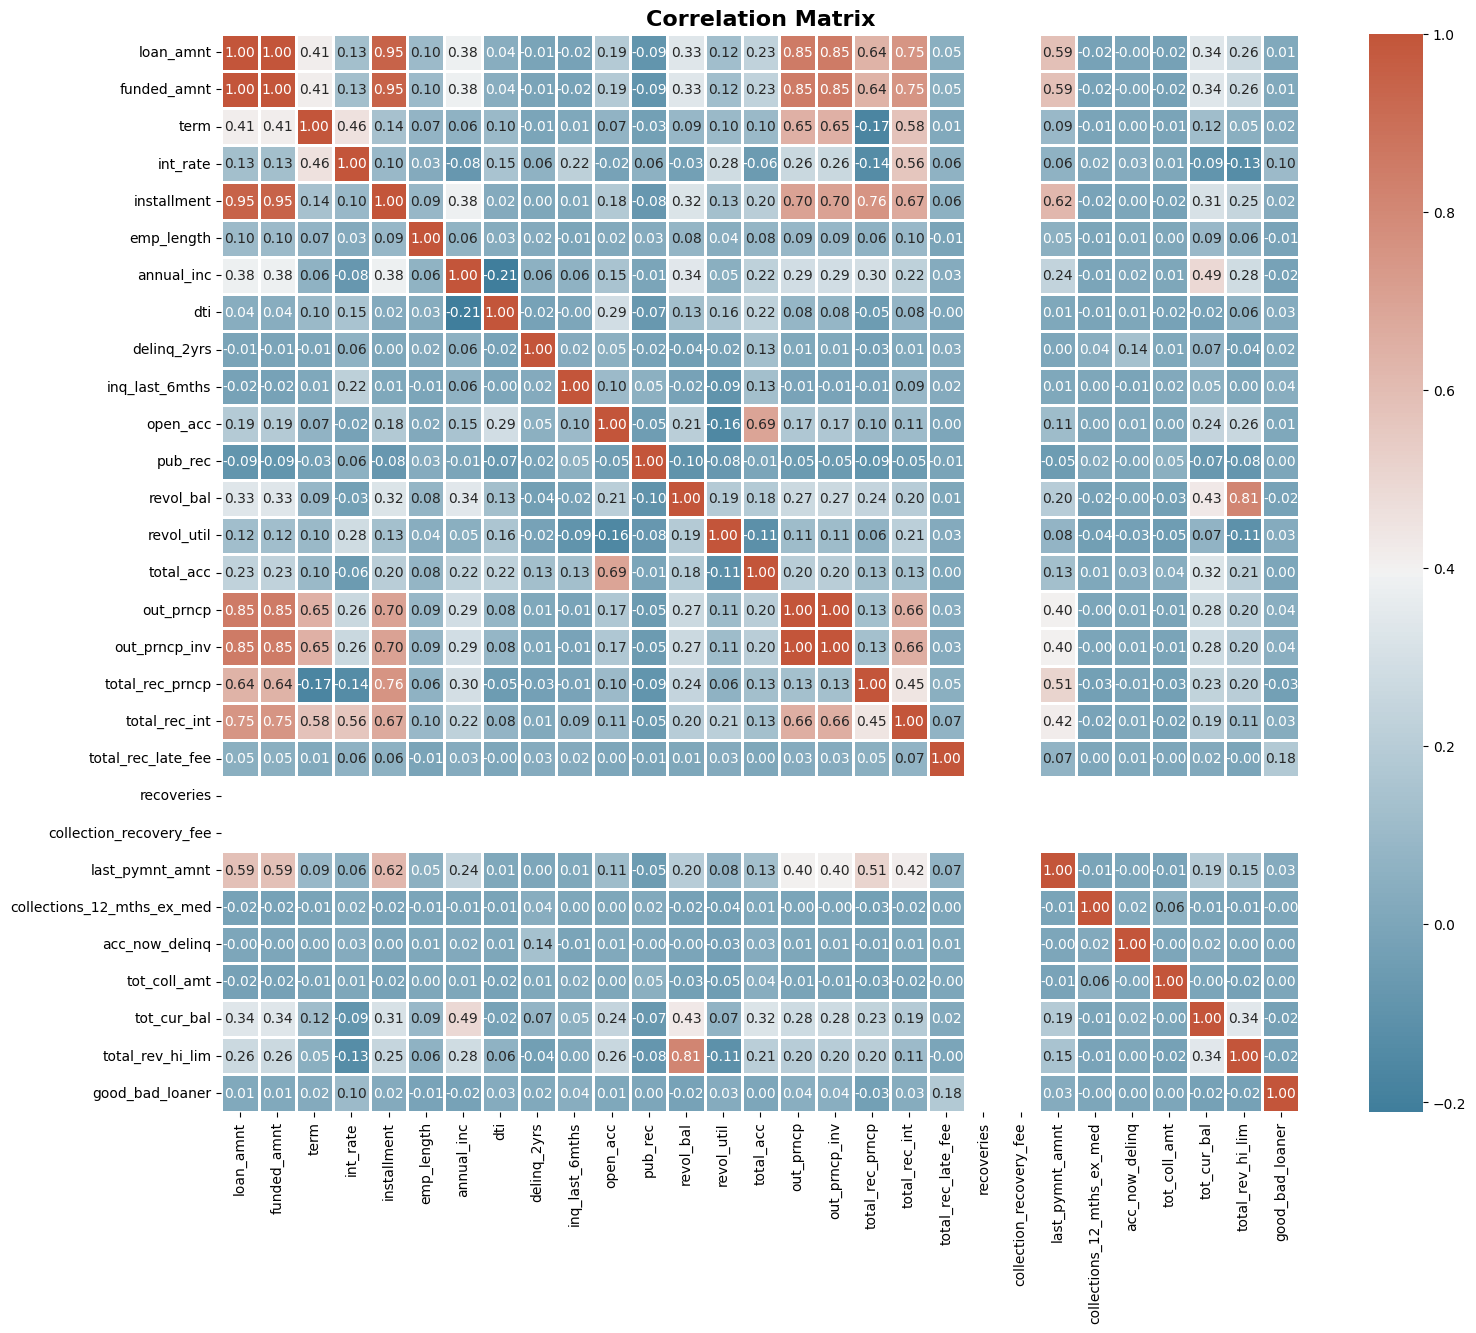

In [45]:
# Calculate and visualize the correlation between numerical features
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(18, 14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.75, square=True, ax=ax)

title = "Correlation Matrix"
plt.title(title, fontsize=16, fontweight='bold')
plt.show()

The correlation matrix reveals several key relationships between features. The loan amount and funded amount have a perfect correlation (1.00), indicating they are nearly identical. Similarly, installment and loan amount show a strong correlation (0.95), suggesting that higher loans result in higher monthly payments. Additionally, out_prncp and out_prncp_inv also have a perfect correlation (1.00), as both represent the outstanding principal. Meanwhile, the good/bad loaner label shows weak correlations with other features, indicating that loan default risk is influenced by multiple factors beyond those captured in this dataset. These insights are crucial for refining feature selection in predictive modeling.

Exploring Numerical Data Distribution with Histograms

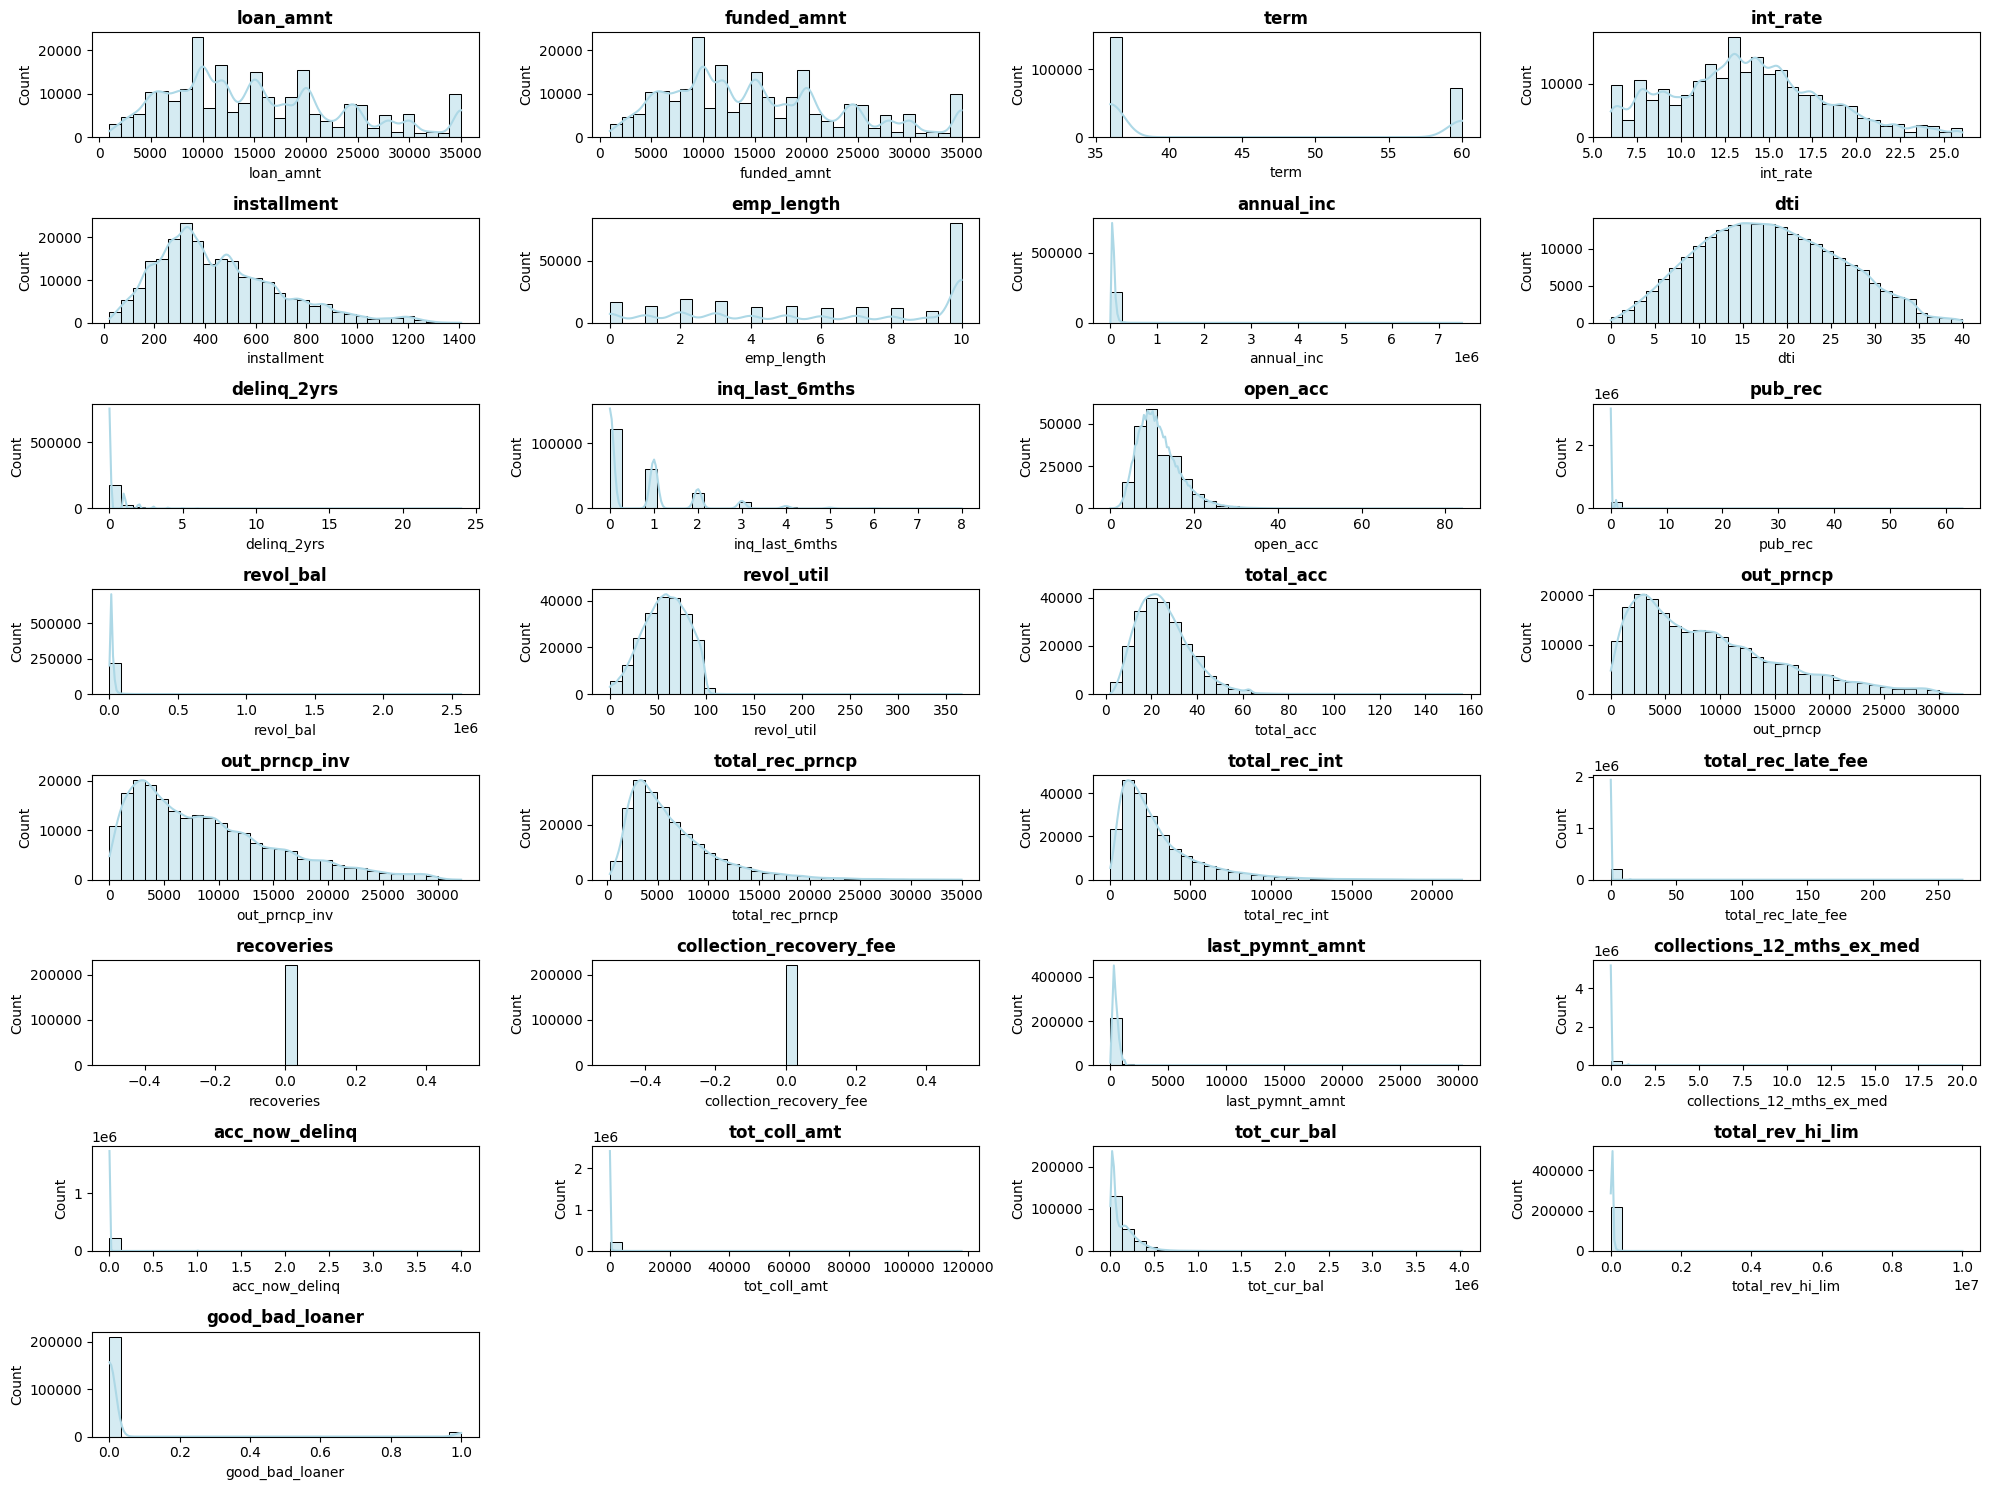

In [46]:
# Visualizing the distribution of all numerical features using histograms
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(-(-len(numeric_cols) // 4), 4, i)
    sns.histplot(df[col], bins=30, kde=True, color='lightblue')
    plt.title(col, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Based on the histogram, the columns `int_rate` and `dti` exhibit a distribution that is close to normal. This suggests that these features may follow a typical bell-shaped curve, which could be useful for statistical analysis and modeling.

Outlier Analysis for Numerical Data

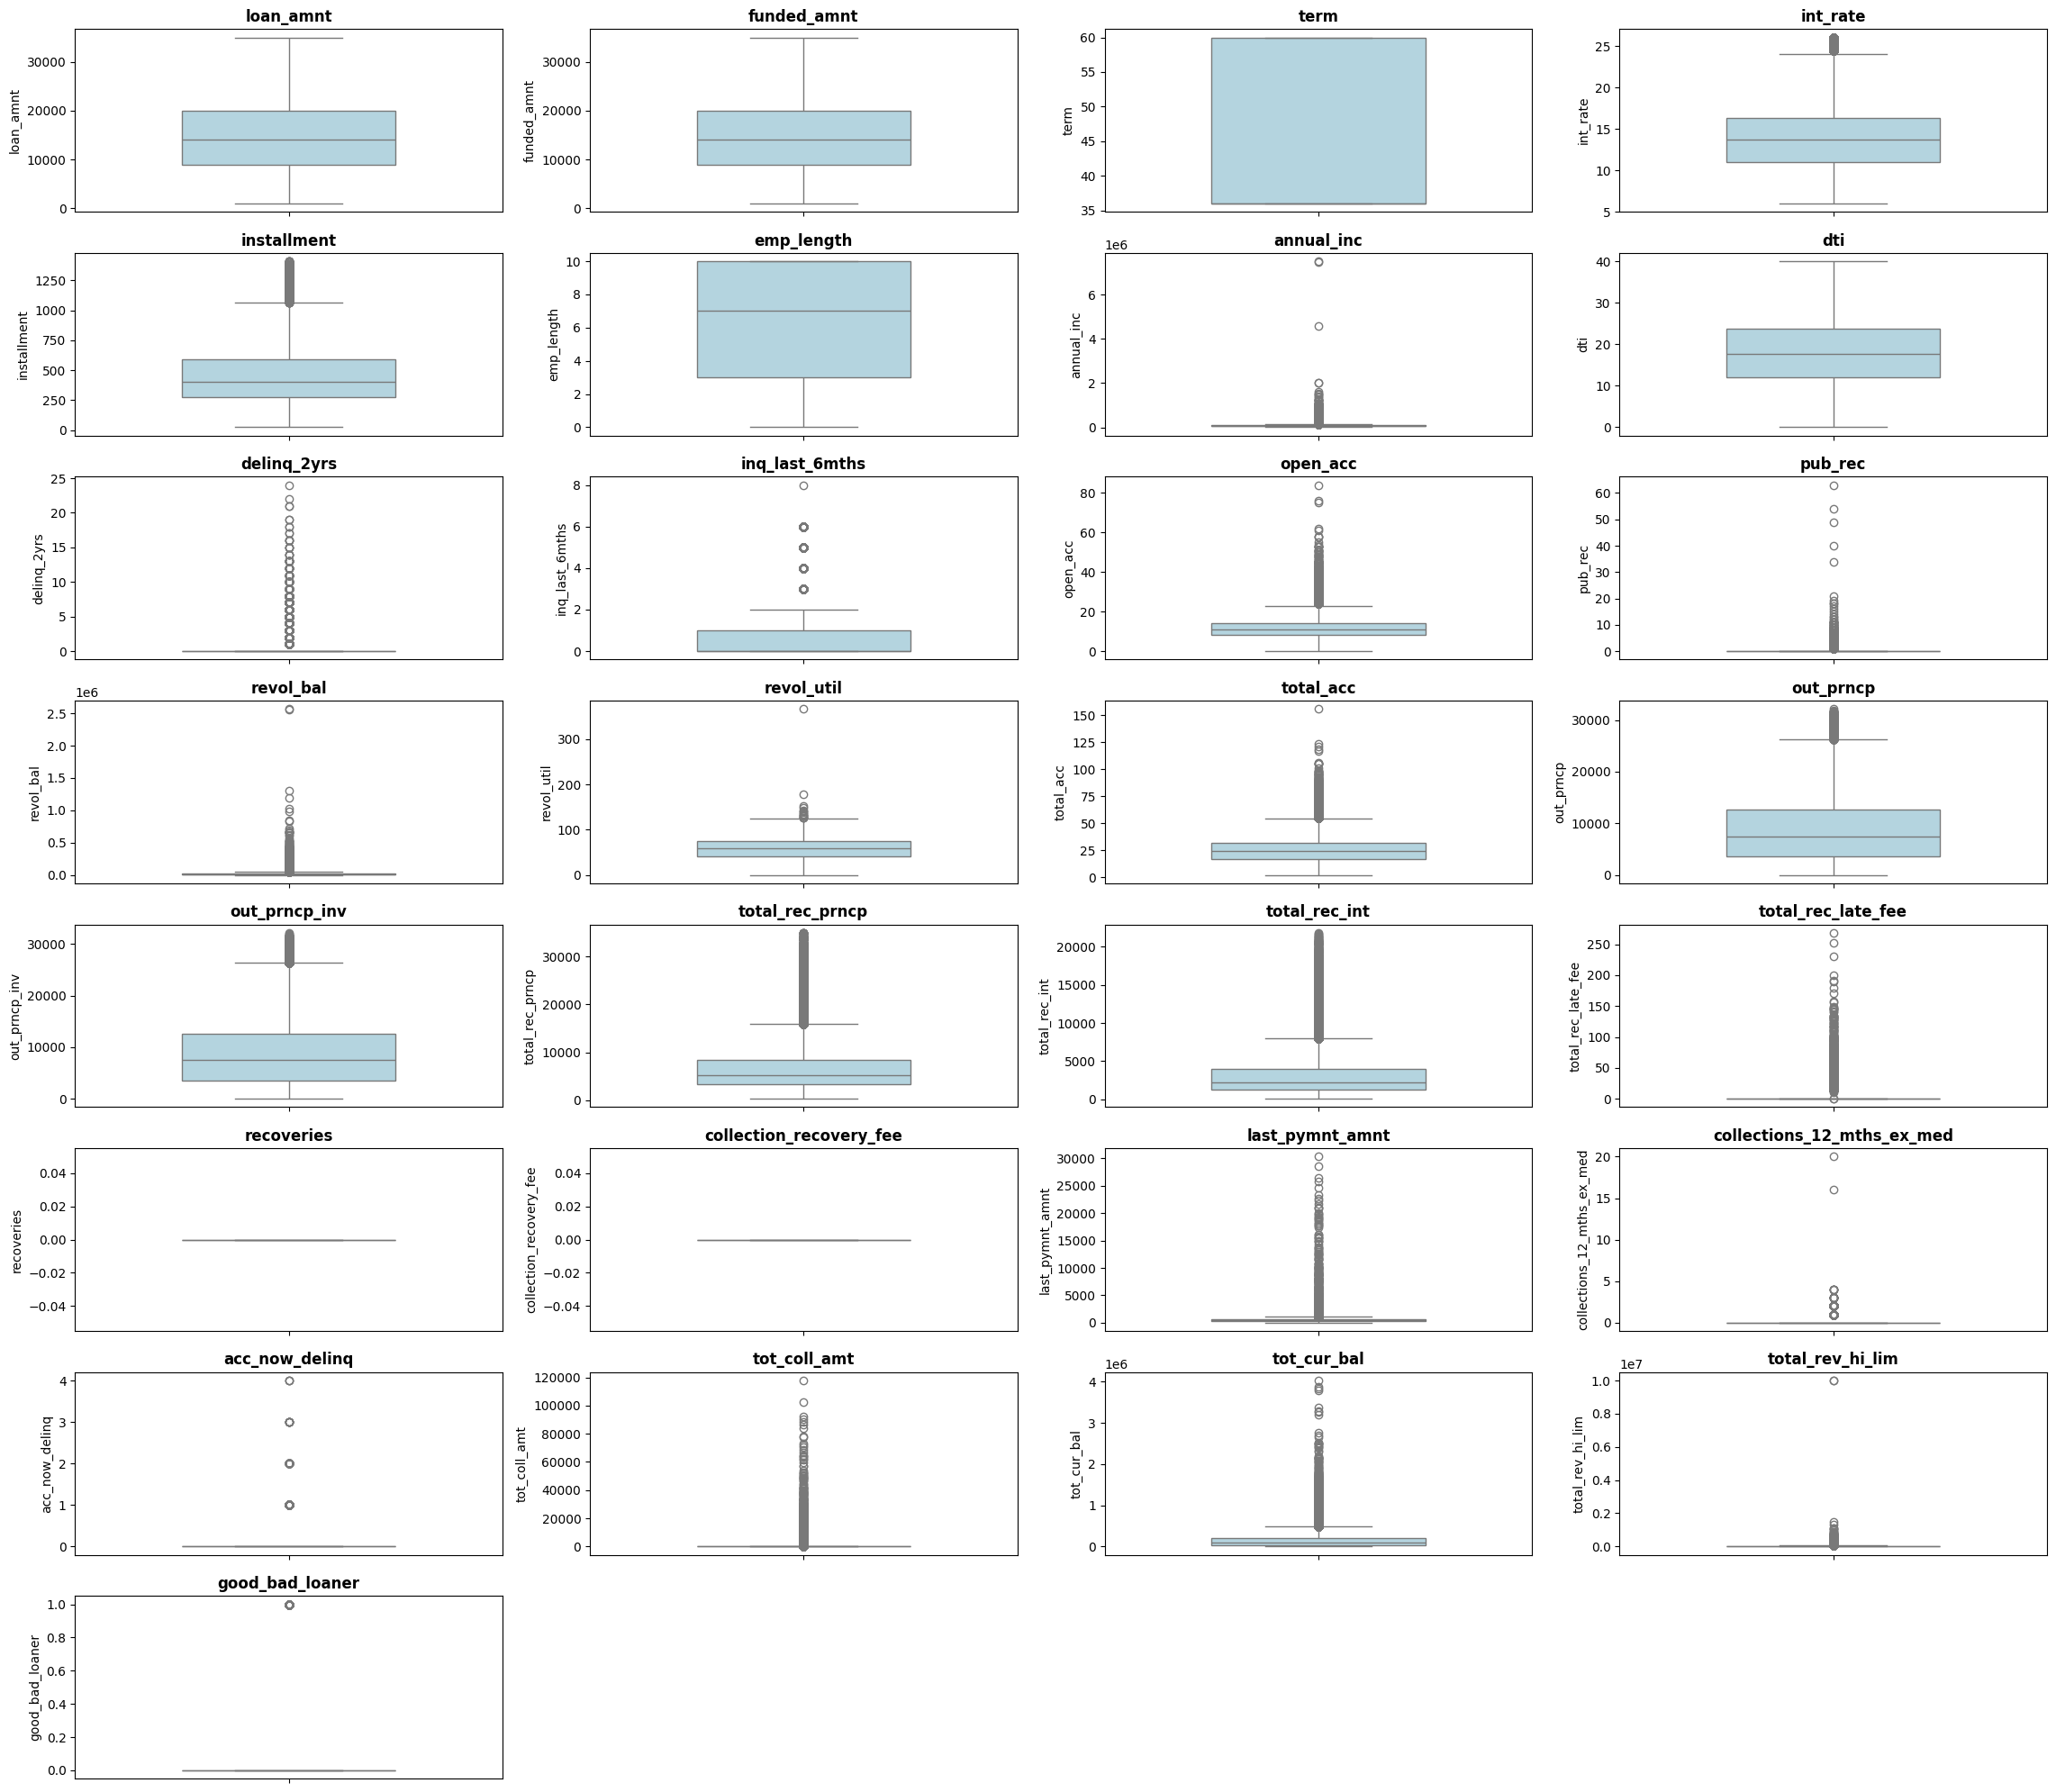

In [47]:
# Visualizing outliers in numerical features using boxplots
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(23, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(-(-len(numeric_cols) // 4), 4, i)
    sns.boxplot(y=df[col], color='lightblue', width=0.5)
    plt.title(col, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Univariate Analysis

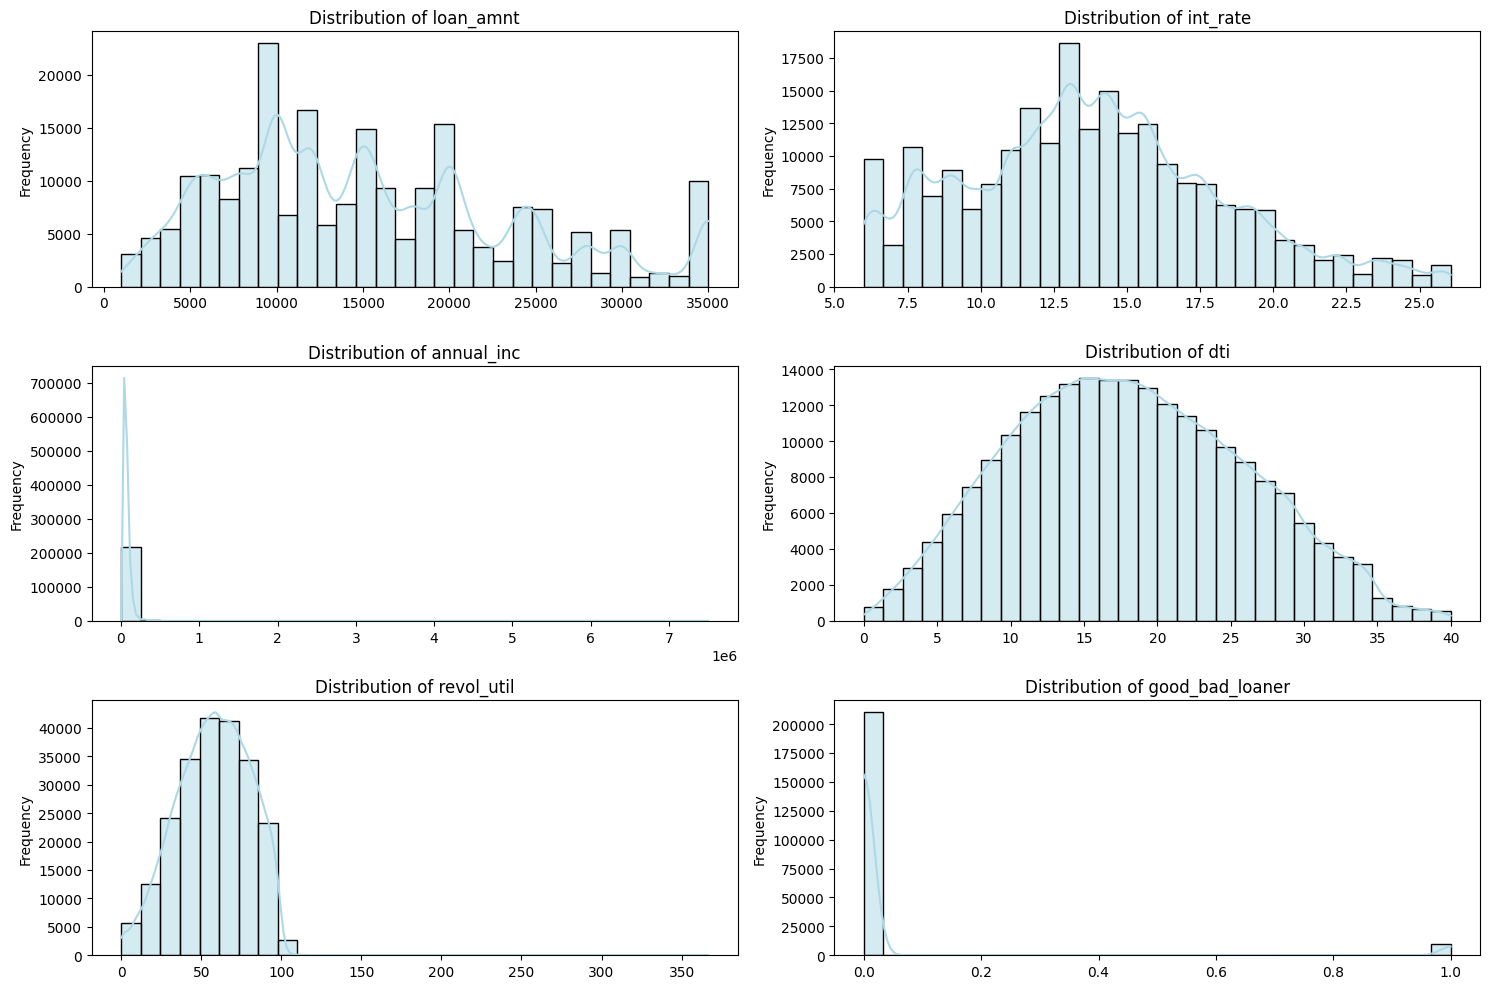

In [48]:
# Visualizing the distribution of selected key features
features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util', 'good_bad_loaner']
plt.figure(figsize=(15, 10))

for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=30, kde=True, color='lightblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Bivariate Analysis

<ipython-input-49-faf3494fb128>:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df['good_bad_loaner'], y=df['int_rate'], palette=['lightblue'])


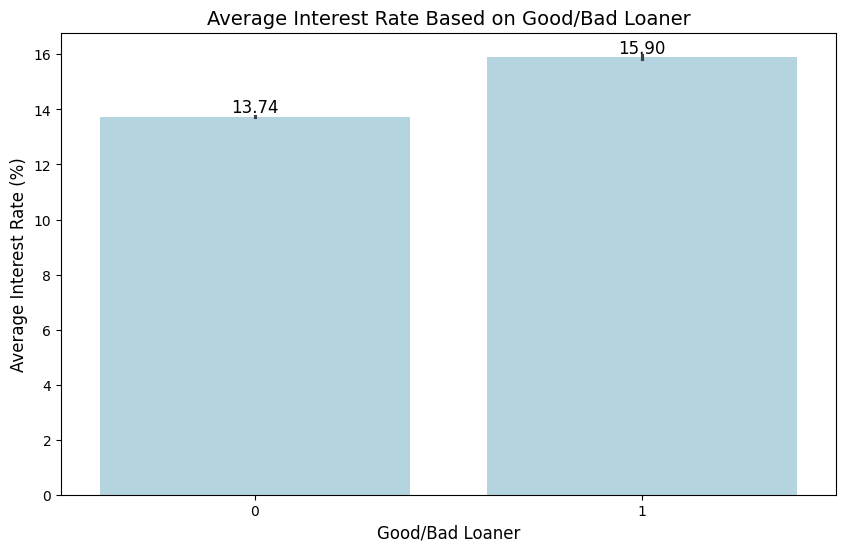

In [49]:
# Visualizing the average interest rate for good and bad loaners
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['good_bad_loaner'], y=df['int_rate'], palette=['lightblue'])

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title("Average Interest Rate Based on Good/Bad Loaner", fontsize=14)
plt.xlabel("Good/Bad Loaner", fontsize=12)
plt.ylabel("Average Interest Rate (%)", fontsize=12)
plt.show()

## DATA PREPARATION

### Handling Outliers

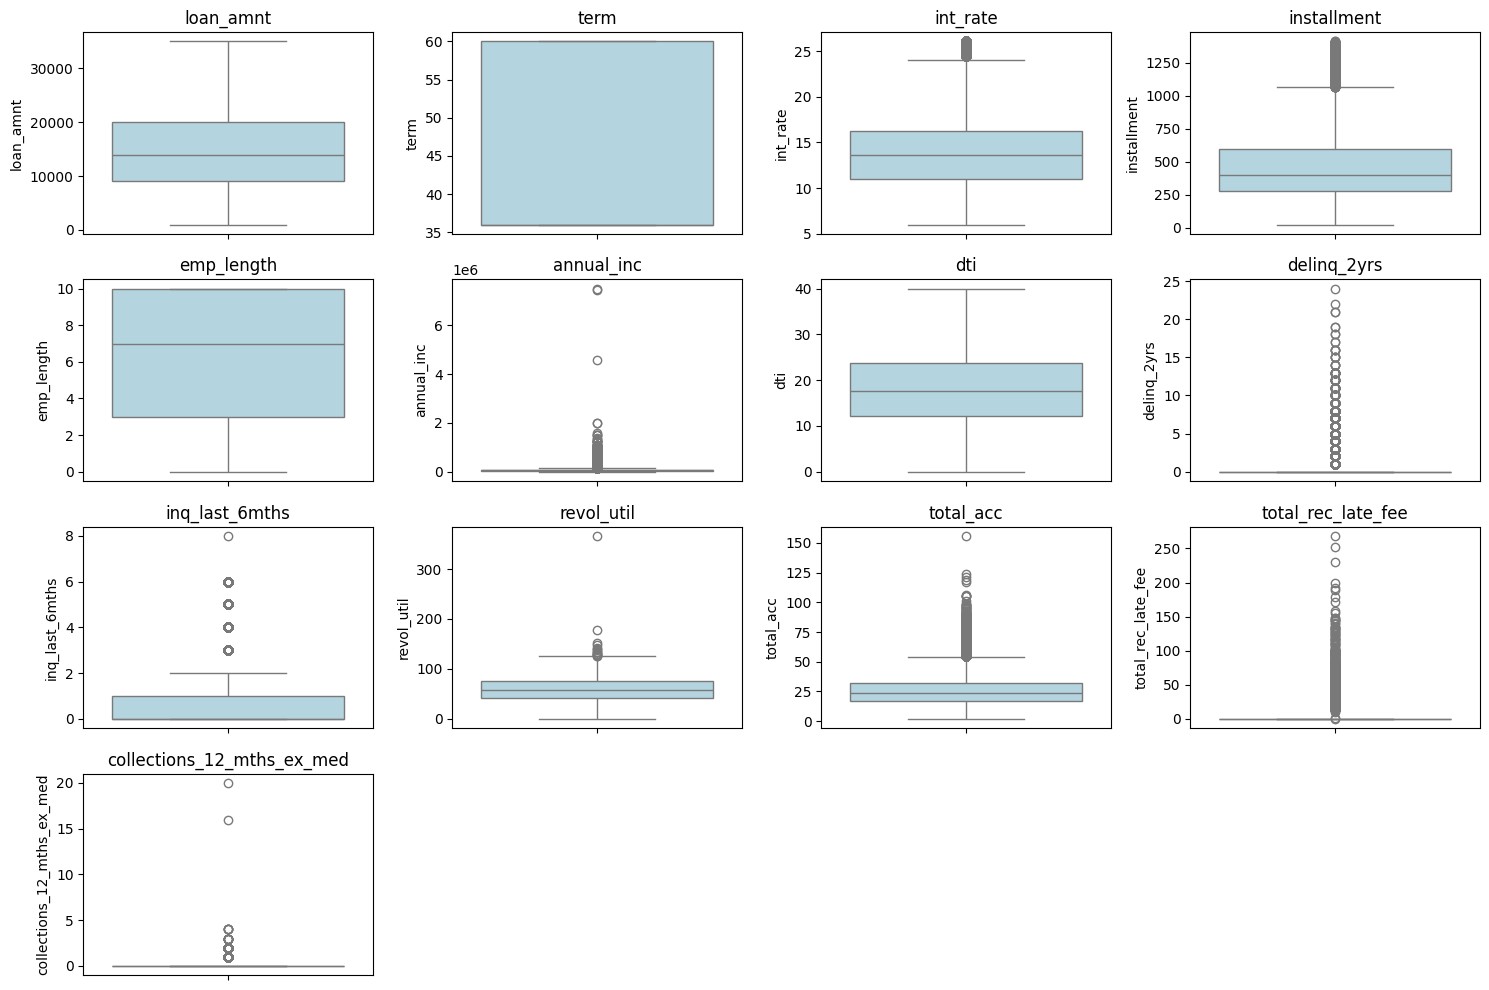

In [50]:
# Visualizing outliers in selected numerical columns using boxplots
outlier_columns = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'revol_util',
    'total_acc', 'total_rec_late_fee', 'collections_12_mths_ex_med'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(outlier_columns):
    plt.subplot((len(outlier_columns) // 4) + 1, 4, i + 1)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(col)

plt.tight_layout()
plt.show()

Based on the boxplot above, several columns contain extreme outliers. To reduce these outliers, a transformation will be applied to minimize their impact.

In [51]:
# Displaying summary statistics for columns that may contain outliers
df[outlier_columns].describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med
count,220286.000000,220286.000000,220286.000000,220286.000000,220286.000000,2.202860e+05,220286.000000,220286.000000,220286.000000,220286.000000,220286.000000,220286.000000,220286.000000
mean,15327.400289,43.954822,13.838894,453.051158,6.202968,7.580857e+04,18.051912,0.331460,0.704516,57.653564,25.435171,0.495416,0.012615
std,8420.520441,11.297660,4.351895,242.959651,3.629021,5.519797e+04,7.909271,0.870085,0.993388,22.531262,11.551307,4.671913,0.131167
min,1000.000000,36.000000,6.000000,23.260000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,9000.000000,36.000000,10.990000,275.980000,3.000000,4.700000e+04,12.100000,0.000000,0.000000,41.500000,17.000000,0.000000,0.000000
50%,14000.000000,36.000000,13.660000,399.970000,7.000000,6.500000e+04,17.670000,0.000000,0.000000,58.600000,24.000000,0.000000,0.000000
75%,20000.000000,60.000000,16.290000,592.722500,10.000000,9.000000e+04,23.740000,0.000000,1.000000,75.100000,32.000000,0.000000,0.000000
max,35000.000000,60.000000,26.060000,1409.990000,10.000000,7.500000e+06,39.990000,24.000000,8.000000,366.600000,156.000000,268.550000,20.000000


In [52]:
# Applying log transformation to selected features
features_to_log = [
    'annual_inc', 'total_rec_late_fee', 'delinq_2yrs', 'collections_12_mths_ex_med', 'inq_last_6mths'
]

df[features_to_log] = df[features_to_log].transform(np.log1p)

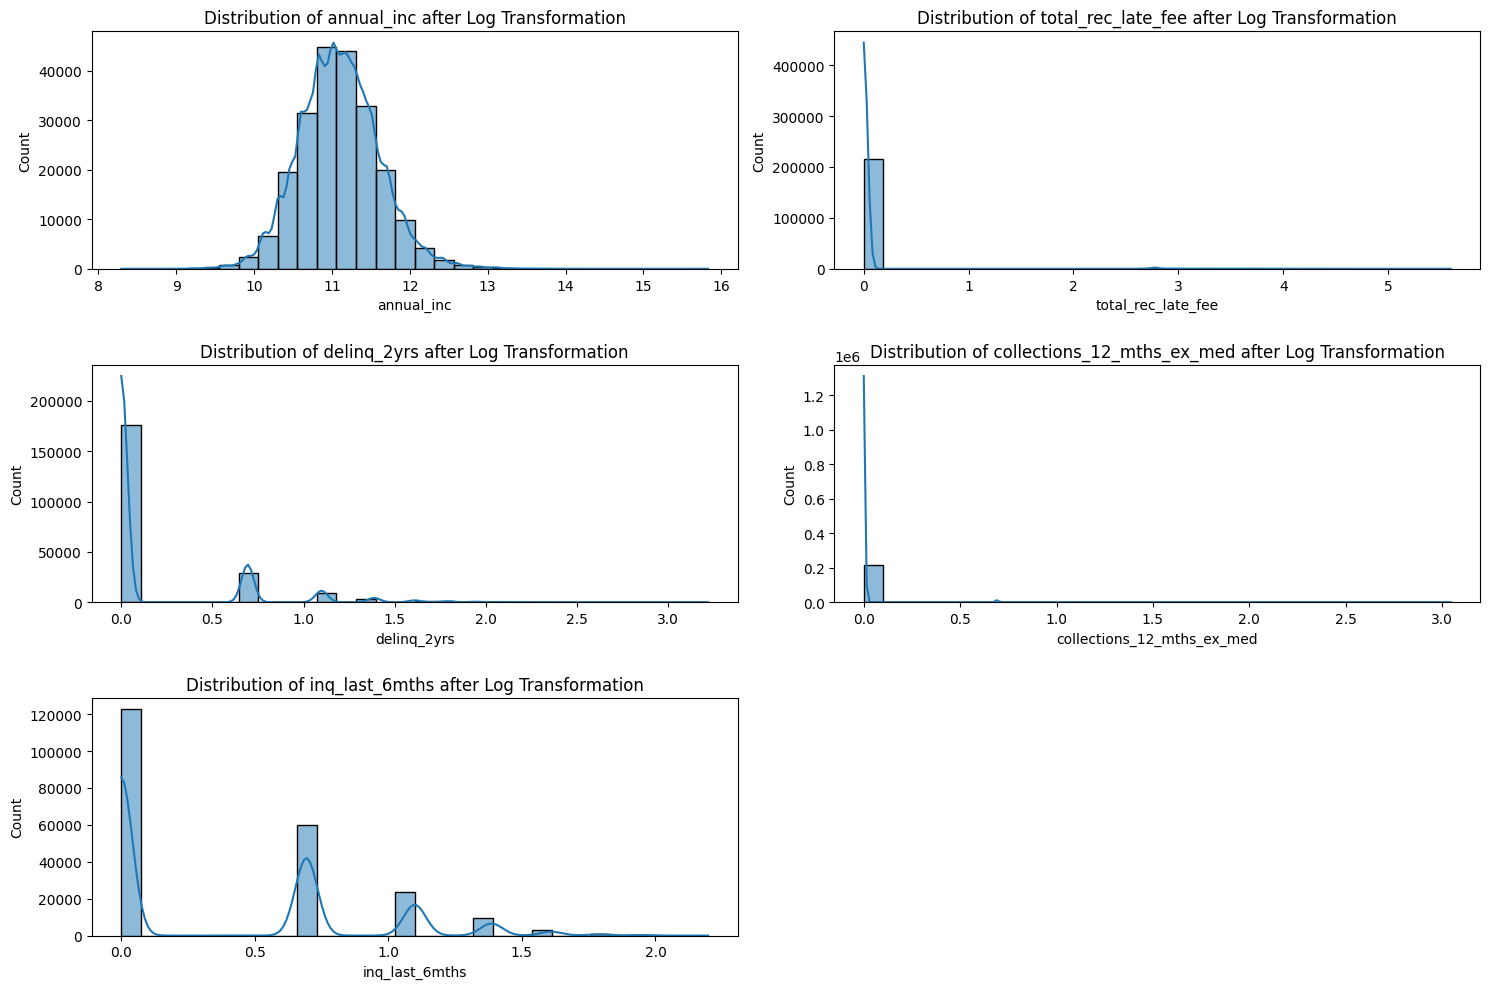

In [53]:
# Visualizing the distribution after log transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_log):
  plt.subplot(len(features_to_log) // 2 + 1, 2, i + 1)
  sns.histplot(df[col], bins=30, kde=True)
  plt.title(f'Distribution of {col} after Log Transformation')

plt.tight_layout()
plt.show()

With the application of Log Transformation, the distribution of the `annual_inc` column appears more normal, making it ready to be used as a feature in the model. However, some columns, such as `total_rec_late_fee`, `collections_12_mths_ex_med`, `delinq_2yrs`, and `inq_last_6mths`, still have high peaks, likely due to many borrowers having no late payments or outstanding collections.

In [54]:
# Confirming that the transformed features are correctly assigned to the main dataframe
for col in features_to_log:
  df[col] = df[col]

In [55]:
# Show all column names in the dataframe
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'annual_inc', 'issue_d', 'loan_status', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'good_bad_loaner'],
      dtype='object')

### Scaling Data

In [56]:
# Scaling numerical features using StandardScaler
features_to_scale = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'revol_util',
    'total_acc', 'total_rec_late_fee', 'collections_12_mths_ex_med'
]

scaler = StandardScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df[features_to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,220286.0,3.019112e-17,1.000002,-1.701490,-0.751428,-0.157639,0.554908,2.336274
term,220286.0,1.543101e-16,1.000002,-0.704114,-0.704114,-0.704114,1.420225,1.420225
int_rate,220286.0,-2.239819e-16,1.000002,-1.801264,-0.654634,-0.041107,0.563229,2.808233
installment,220286.0,1.452786e-16,1.000002,-1.768986,-0.728811,-0.218478,0.574876,3.938683
emp_length,220286.0,4.012580e-17,1.000002,-1.709271,-0.882600,0.219628,1.046299,1.046299
annual_inc,220286.0,-5.648835e-15,1.000002,-5.478402,-0.659476,-0.025264,0.611264,9.262473
dti,220286.0,5.496331e-17,1.000002,-2.282379,-0.752525,-0.048287,0.719169,2.773724
delinq_2yrs,220286.0,-1.050238e-16,1.000002,-0.464352,-0.464352,-0.464352,-0.464352,7.741701
inq_last_6mths,220286.0,2.296589e-17,1.000002,-0.818099,-0.818099,-0.818099,0.598103,3.671158
revol_util,220286.0,2.438513e-16,1.000002,-2.558831,-0.716942,0.042006,0.774323,13.711932


In [57]:
# Making sure the scaled features remain in the dataframe after transformation.
for col in features_to_scale:
  df[col] = df[col]

Selection Feature

In [58]:
# Selecting relevant features for analysis and modeling,
selected_features = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'revol_util',
    'total_acc', 'total_rec_late_fee', 'collections_12_mths_ex_med', 'good_bad_loaner'
]

df = df[selected_features]

In [59]:
# Check the features in the dataset

print(df.head())
print("Remaining columns: ", df.columns)

       loan_amnt      term  int_rate  installment  emp_length  annual_inc  \
42535   1.392150 -0.704114 -0.654634     1.779760    1.046299   -0.352022   
42536  -0.662360 -0.704114  0.032424    -0.493545   -1.433714   -1.817512   
42537  -0.395155 -0.704114 -1.658797    -0.348212    1.046299    0.912784   
42539  -0.038881 -0.704114 -1.134886     0.095690   -1.158157   -0.086394   
42540  -0.395155 -0.704114 -0.424849    -0.224446    1.046299    1.330538   

            dti  delinq_2yrs  inq_last_6mths  revol_util  total_acc  \
42535  0.609171    -0.464352       -0.818099    0.157401   0.135468   
42536  0.893648    -0.464352       -0.818099   -0.215415   0.222039   
42537 -0.505978    -0.464352        0.598103   -1.600161  -0.297384   
42539 -0.194950    -0.464352       -0.818099    0.734378   0.308609   
42540 -0.634941    -0.464352        0.598103    0.414822  -0.557096   

       total_rec_late_fee  collections_12_mths_ex_med  good_bad_loaner  
42535           -0.129074            

SMOTE for Imbalance Data

In [60]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [61]:
# Split the features and target
X = df.drop(columns=['good_bad_loaner']) # Features
y = df['good_bad_loaner'] # Target

# Apply SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution before applying SMOTE
print("Before Oversampling:", Counter(y))

# Check the distribution after applying SMOTE
print("After Oversampling:", Counter(y_resampled))

Before Oversampling: Counter({0: 210159, 1: 10127})
After Oversampling: Counter({0: 210159, 1: 210159})


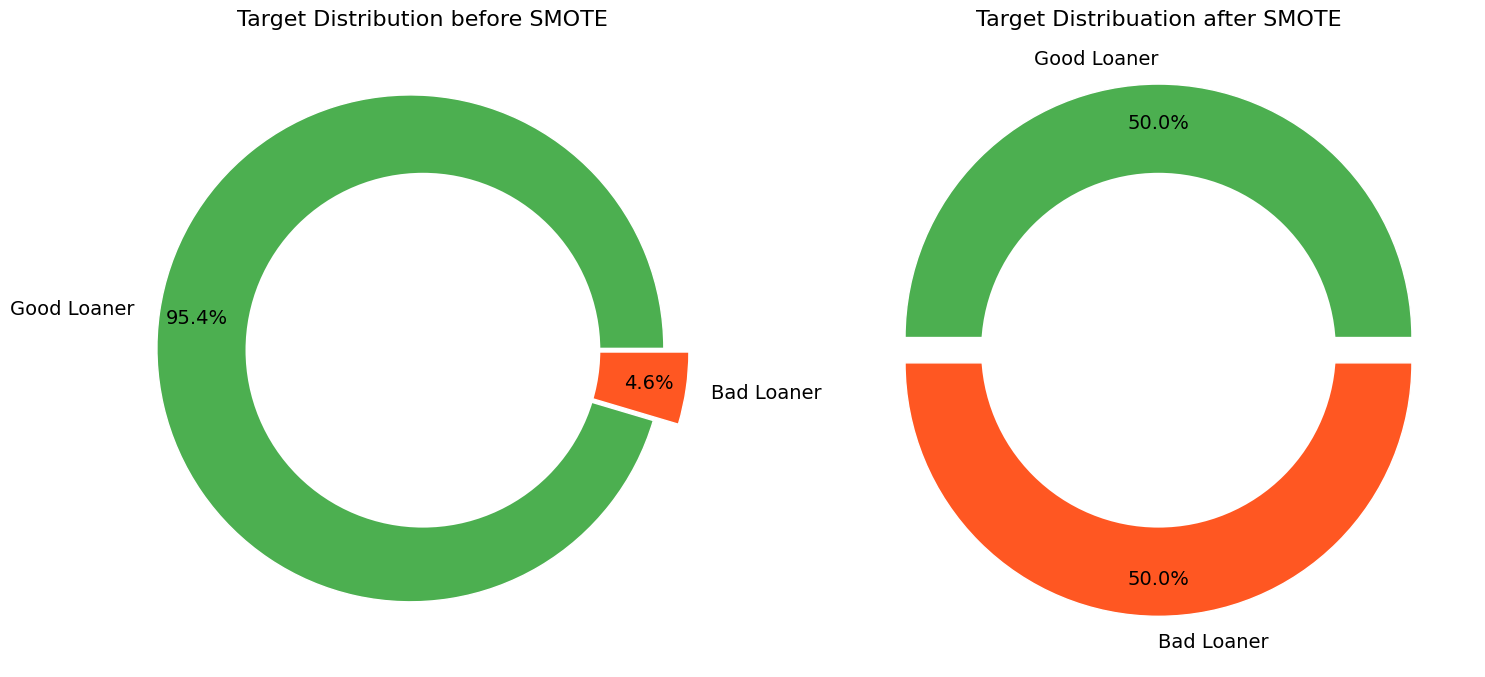

In [62]:
from collections import Counter
import matplotlib.pyplot as plt

# Visualizing the distribution of the target variable before and after applying SMOTE using donut charts
before_counts = Counter(y)
after_counts = Counter(y_resampled)
colors = ['#4CAF50', '#FF5722']
labels = ['Good Loaner', 'Bad Loaner']

# Create subplots for donut charts
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Donut chart before SMOTE
axes[0].pie(before_counts.values(), labels=labels, colors=colors, autopct='%1.1f%%',
            pctdistance=0.85, explode=[0.05, 0.05], textprops={'fontsize': 14},
            wedgeprops={'edgecolor': 'white'})
axes[0].add_artist(plt.Circle((0, 0), 0.70, fc='white'))
axes[0].set_title('Target Distribution before SMOTE', fontsize=16)

# Donut chart after SMOTE
axes[1].pie(after_counts.values(), labels=labels, colors=colors, autopct='%1.1f%%',
            pctdistance=0.85, explode=[0.05, 0.05], textprops={'fontsize': 14},
            wedgeprops={'edgecolor': 'white'})
axes[1].add_artist(plt.Circle((0, 0), 0.70, fc='white'))
axes[1].set_title('Target Distribuation after SMOTE', fontsize=16)

# Display the charts
plt.tight_layout()
plt.show()

### Spliting Data

In [63]:
# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Display the number of samples in the training and testing datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 336254 samples
Testing set size: 84064 samples


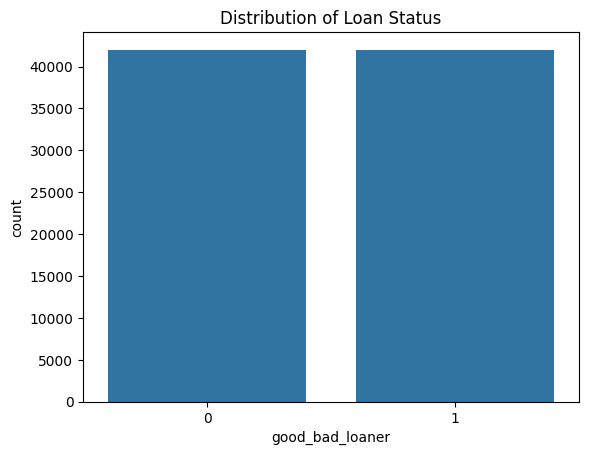

In [64]:
# Visualize the 'good_bad_loaner' column using a Barplot

sns.countplot(x=y_test)
plt.title("Distribution of Loan Status")
plt.show()

## DATA MODELLING

In [65]:
#Logistic Regression
lr = LogisticRegression(penalty='l2', random_state=42)
lr.fit(X_train, y_train)
Y_pred = lr.predict(X_test)

# Metrics
acc_lr = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_lr = round(precision_score(y_test, Y_pred) * 100, 2)
recall_lr = round(recall_score(y_test, Y_pred) * 100, 2)
roc_auc_lr = round(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]) * 100, 2)
cv_lr = round(cross_val_score(lr, X_test, y_test, cv=3).mean() * 100, 2)

# Print results
print(f"Accuracy: {acc_lr}")
print(f"Precision: {prec_lr}")
print(f"Recall: {recall_lr}")
print(f"ROC-AUC: {roc_auc_lr}")
print(f"Cross Validation Score: {cv_lr}")


Accuracy: 63.22
Precision: 65.27
Recall: 56.52
ROC-AUC: 69.75
Cross Validation Score: 63.1


In [66]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

# Metrics
acc_rf = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_rf = round(precision_score(y_test, Y_pred) * 100, 2)
recall_rf = round(recall_score(y_test, Y_pred) * 100, 2)
roc_auc_rf = round(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]) * 100, 2)
cv_rf = round(cross_val_score(rf, X_test, y_test, cv=3).mean() * 100, 2)

# Print results
print(f"Accuracy: {acc_rf}")
print(f"Precision: {prec_rf}")
print(f"Recall: {recall_rf}")
print(f"ROC-AUC: {roc_auc_rf}")
print(f"Cross Validation Score: {cv_rf}")

Accuracy: 67.08
Precision: 66.54
Recall: 68.71
ROC-AUC: 75.85
Cross Validation Score: 67.67


In [67]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

# Metrics
acc_dt = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_dt = round(precision_score(y_test, Y_pred) * 100, 2)
recall_dt = round(recall_score(y_test, Y_pred) * 100, 2)
roc_auc_dt = round(roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]) * 100, 2)
cv_dt = round(cross_val_score(dt, X_test, y_test, cv=3).mean() * 100, 2)

# Print results
print(f"Accuracy: {acc_dt}")
print(f"Precision: {prec_dt}")
print(f"Recall: {recall_dt}")
print(f"ROC-AUC: {roc_auc_dt}")
print(f"Cross Validation Score: {cv_dt}")


Accuracy: 64.11
Precision: 60.35
Recall: 82.28
ROC-AUC: 69.13
Cross Validation Score: 64.39


In [68]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

# Metrics
acc_knn = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_knn = round(precision_score(y_test, Y_pred) * 100, 2)
recall_knn = round(recall_score(y_test, Y_pred) * 100, 2)
roc_auc_knn = round(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]) * 100, 2)
cv_knn = round(cross_val_score(knn, X_test, y_test, cv=3).mean() * 100, 2)

# Print results
print(f"Accuracy: {acc_knn}")
print(f"Precision: {prec_knn}")
print(f"Recall: {recall_knn}")
print(f"ROC-AUC: {roc_auc_knn}")
print(f"Cross Validation Score: {cv_knn}")


Accuracy: 88.78
Precision: 81.76
Recall: 99.83
ROC-AUC: 96.18
Cross Validation Score: 78.14


In [69]:
# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
Y_pred = nb.predict(X_test)

# Metrics
acc_nb = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_nb = round(precision_score(y_test, Y_pred) * 100, 2)
recall_nb = round(recall_score(y_test, Y_pred) * 100, 2)
roc_auc_nb = round(roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1]) * 100, 2)
cv_nb = round(cross_val_score(nb, X_test, y_test, cv=3).mean() * 100, 2)

# Pribt results
print(f"Accuracy: {acc_nb}")
print(f"Precision: {prec_nb}")
print(f"Recall: {recall_nb}")
print(f"ROC-AUC: {roc_auc_nb}")
print(f"Cross Validation Score: {cv_nb}")


Accuracy: 57.46
Precision: 82.37
Recall: 18.97
ROC-AUC: 68.35
Cross Validation Score: 57.49


In [70]:
# Stochastic Gradient Descent (SGD)
sgd = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, random_state=42)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

# Metrics
acc_sgd = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_sgd = round(precision_score(y_test, Y_pred) * 100, 2)
recall_sgd = round(recall_score(y_test, Y_pred) * 100, 2)
roc_auc_sgd = round(roc_auc_score(y_test, sgd.decision_function(X_test)) * 100, 2)
cv_sgd = round(cross_val_score(sgd, X_test, y_test, cv=3).mean() * 100, 2)

# Print results
print(f"Accuracy: {acc_sgd}")
print(f"Precision: {prec_sgd}")
print(f"Recall: {recall_sgd}")
print(f"ROC-AUC: {roc_auc_sgd}")
print(f"Cross Validation Score: {cv_sgd}")

Accuracy: 62.89
Precision: 65.18
Recall: 55.34
ROC-AUC: 69.48
Cross Validation Score: 62.89


## MODEL EVALUATION

In [71]:
# Create a DataFrame to compare model performance based on accuracy, ROC-AUC, and cross-validation scores
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest',
              'Decision Tree', 'K-Nearest Neighbors (KNN)',
              'Gaussian Naive Bayes', 'Stochastic Gradient Descent'],
    'Score': [acc_lr,acc_rf, acc_dt, acc_knn,
              acc_nb, acc_sgd],
    'ROC-AUC': [roc_auc_lr, roc_auc_rf, roc_auc_dt, roc_auc_knn, roc_auc_nb, roc_auc_sgd],
    'Cross Validation': [cv_lr, cv_rf, cv_dt, cv_knn,
              cv_nb, cv_sgd]})

# Sort models based on Score, ROC-AUC, and Cross Validation in descending order
evaluation = models.sort_values(by=['Score','ROC-AUC','Cross Validation'], ascending=False)

In [72]:
# Show the evaluation table
evaluation

,Model,Score,ROC-AUC,Cross Validation
3,K-Nearest Neighbors (KNN),88.78,96.18,78.14
1,Random Forest,67.08,75.85,67.67
2,Decision Tree,64.11,69.13,64.39
0,Logistic Regression,63.22,69.75,63.10
5,Stochastic Gradient Descent,62.89,69.48,62.89
4,Gaussian Naive Bayes,57.46,68.35,57.49


The K-Nearest Neighbors (KNN) model performs the best compared to other models. It has the highest Score (88.78), ROC-AUC (96.18), and Cross-Validation Score (78.14). This means KNN is very good at making predictions and distinguishing between classes.

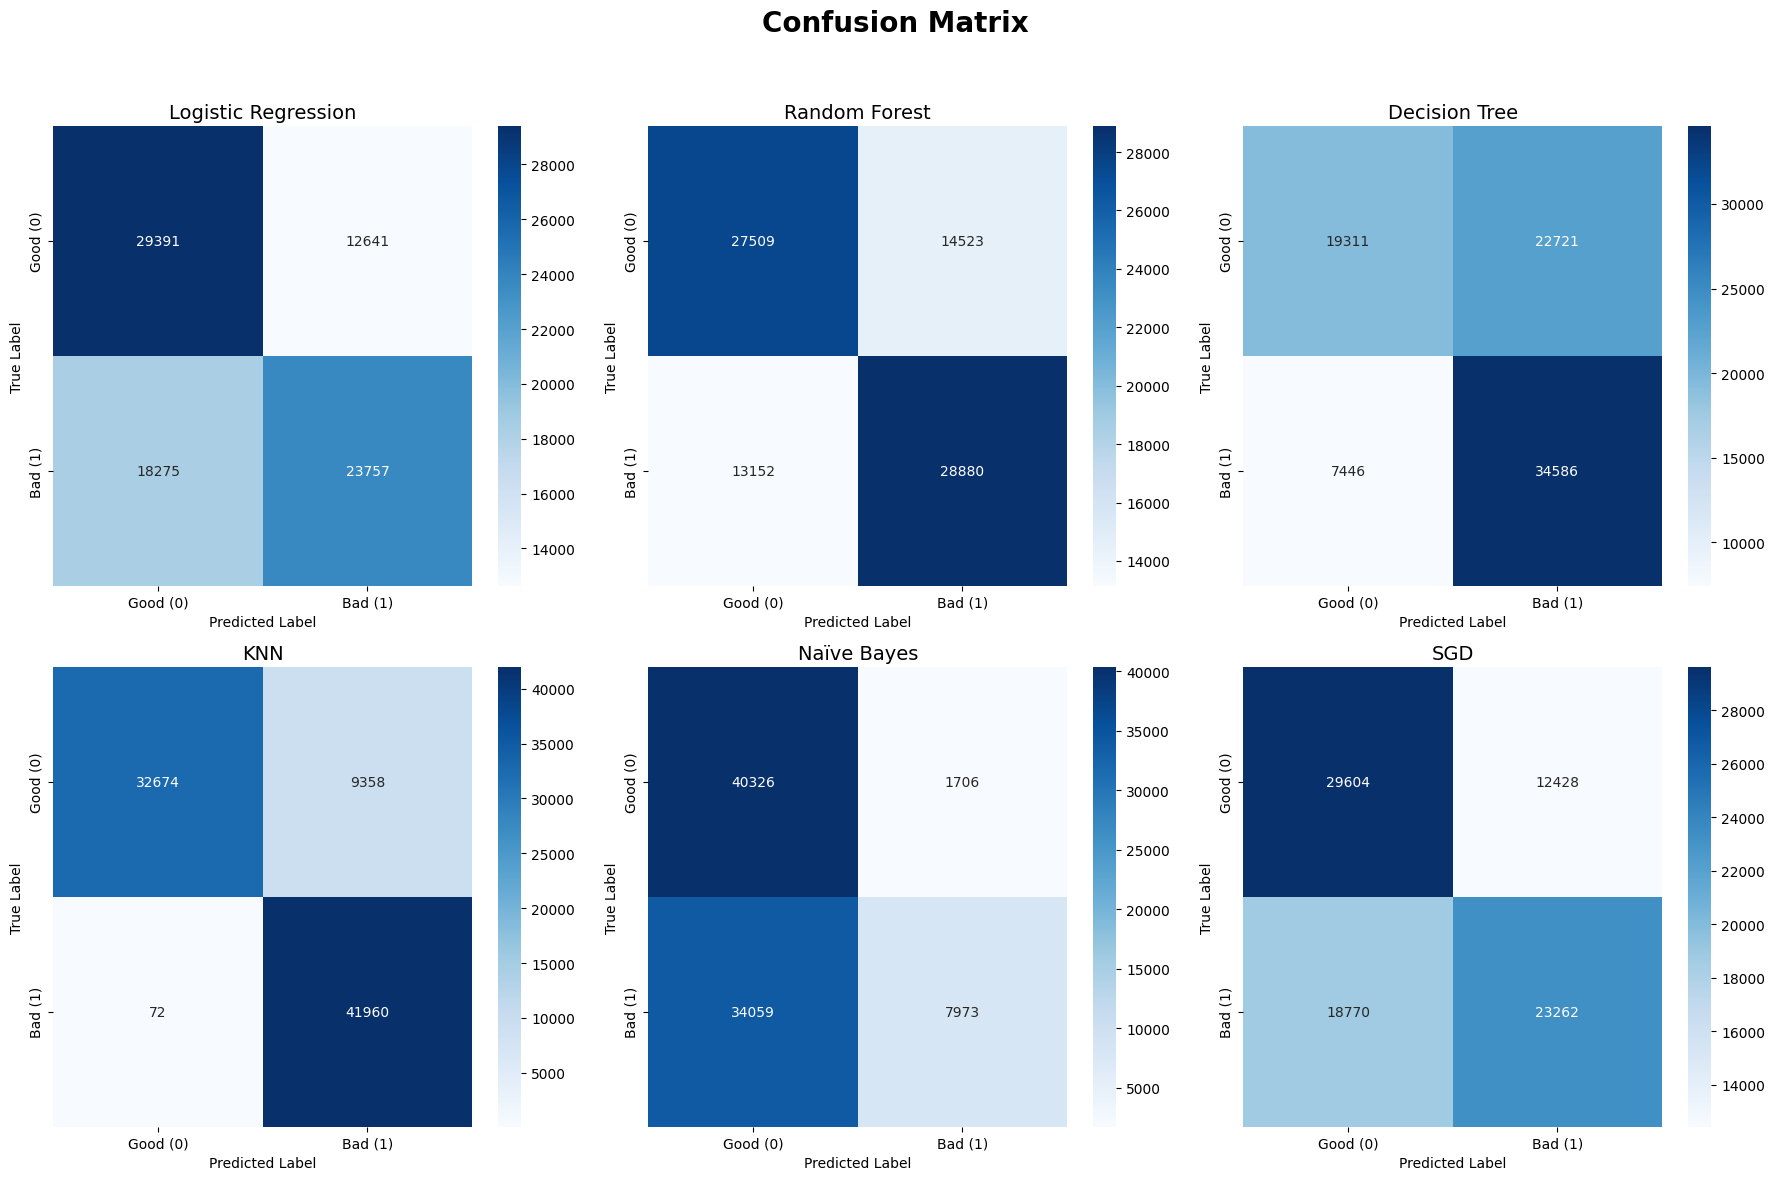

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualizing confusion matrices for each classification model
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB(),
    "SGD": SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, random_state=42)
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Confusion Matrix", fontsize=20, fontweight='bold')

for ax, (model_name, model) in zip(axes.flatten(), models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good (0)", "Bad (1)"],
                yticklabels=["Good (0)", "Bad (1)"], ax=ax)

    ax.set_title(model_name, fontsize=14)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### VALIDATION

In [76]:
# Predicting probabilities for the positive class using KNN
y_pred_proba = knn.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

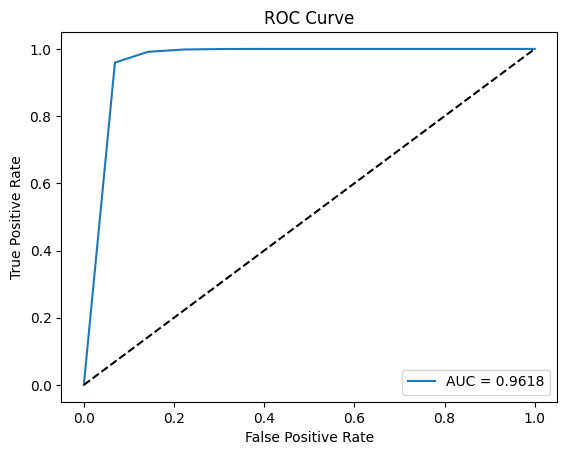

In [75]:
# Plotting the ROC curve to evaluate the model's performance and calculating the AUC score.
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Conclusion

1. Best model: K-Nearest Neighbors
2. The ROC curve demonstrates that the KNN model achieves an outstanding AUC (Area Under the Curve) score of 0.9618, indicating exceptional performance in distinguishing between good loans (0) and bad loans (1). This high AUC value means the model is highly effective at correctly identifying borrowers who are likely to default (true positives) while minimizing false alarms (false positives). Such strong predictive capability is critical for financial institutions to mitigate risks and optimize lending decisions.